#🔧 **PROJETO FINAL**

Esse Notebook é referente ao projeto final pelos professores **Bismark William** e **Igor Gondim** no bootcamp **engenharia de dados** da SoulCode. O projeto visa a consolidação dos conhecimentos obtidos ao decorrer das aulas. Esse projeto será desenvolvido pelos alunos **Daniel Oliveira**, **Gabriela Riedel**, **Ivana Gabriela**, **Jhonathan Turial** e **Walison Silva**. 

 **A proposta foi a seguinte:**

* Vocês deverão aplicar os conceitos vistos durante o curso para tratar, organizar e modelar os dados de no mínimo 2 datasets escolhidos por vocês seguindo o tema de sua equipe.
* Obrigatoriamente deverá conter as tecnologias Google Cloud Platform(Cloud Storage), Python, Pandas, PySpark, Apache Beam*, Data Studio, Big Query e MongoDB.

**REQUISITOS OBRIGATÓRIOS:**

* Obrigatoriamente os datasets devem ter formatos diferentes (CSV / Json / Parquet / Sql / NoSql/ outros) e 1 deles obrigatoriamente tem que ser em CSV.
* Operações com Pandas (limpezas, transformações e normatizações) 
* Operações usando PySpark com a descrição de cada uma das operações.
* Os datasets utilizados podem ser em língua estrangeira, mas devem ao final terem seus dados/colunas exibidos na lingua PT-BR (Utilizar a diretrizes abordadas em aula) 
* Os datasets devem ser salvos e operados em armazenamento cloud obrigatoriamente dentro da plataforma GCP (não pode ser usado Google drive ou armazenamento alheio ao google) 
* Os dados tratados devem ser armazenados obrigatoriamente em um data lake (Gstorage ), DW (BigQuery) ou em ambos.
* Os datasets originais devem ser armazenados em MySql.
* Os Dataframe(s) resultante(s) deve(m) estar em uma coleção do mongoDb atlas (informar a key de acesso ao cluster) 
* Deve ser feita análises dentro do Big Query utilizando a linguagem padrão SQL com a descrição das consultas feitas.
* Deve ser criado no Looker Studio um dashboard para exibição gráfica dos dados tratados trazendo insights importantes
* Deve ser demonstrado em um workflow simples (gráfico) as etapas de ETL com suas respectivas ferramentas.

**REQUISITOS DESEJÁVEIS:**

* Implementar ingestão de dados e transformações por meio de uma PIPELINE com modelo criado em apache beam usando o dataflow para o work
* Utilizar o dataflow com algum modelo pré-definido
* Criar plotagens usando pandas para alguns insights durante o processo de Transformação 
* Por meio de uma PIPELINE fazer o carregamento dos dados normalizados diretamente para um DW ou DataLake ou ambos
* Montar um relatório completo com os insights que justificam todo o processo de ETL utilizado
* Levantar custos com a utilização do google cloud no período do projeto e possíveis otimizações de custo






✅ **Você pode encontrar esse notebook nos repositórios** [GitHub](https://github.com/Daniel022de/Bootcamp_SoulCode_EngenhariaDados)

✅ **Você pode entrar em contato conosco através dos email** ddololiveira.pessoal@gmail.com, gabrielariedel1@gmail.com, ivana.gac@gmail.com, jhon.turiali@gmail.com e  walisonmeizu@gmail.com

✅ **Toda dúvida,recomendações e feedbacks serão bem-vindas.**


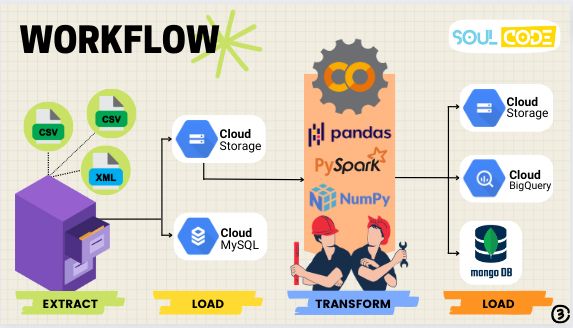





#⚡ 1   **Instalação**

In [ ]:
#Google Cloud Storage File Systemy
!pip install gcsfs

In [ ]:
#PySpark
!pip install pyspark

In [ ]:
#Pandera
!pip install pandera

#⚡ 2   **Importando Bibliotecas**

In [ ]:
#BIBLIOTECAS NECESSÁRIAS PARA MANIPULAÇÃO DOS DADOS
import pandas as pd
import numpy as np
import pandera as pa
from pyspark.sql.types import *

#BIBLIOTECAS NECESSÁRIAS PARA MANIPULAÇÃO DO PYSPARK
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import coalesce
from pyspark.sql.functions import row_number, monotonically_increasing_id
from pyspark.sql.types import *
from pyspark.sql import Window

#IMPORTAR BIBLIOTECAS DO CLOUD STORAGE
import os
from google.cloud import storage
from google.cloud import bigquery

#IMPORTANDO BIBLIOTECA MONGODB
from pymongo import MongoClient



#⚡ 3    **Conexão ao Storage - GCP**

↪ `Essa conexão ao Google Cloud Storage é com a finalidade de extrair os datasets armazenados nela`

##✅ *3.1  Setando Chave de segurança*

In [ ]:
ServiceAccount = '/content/projeto-final-soulcode-373914-e1a393933592.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = ServiceAccount

#⚡ 4 **Apontando - DataSets - Bucket**

###✅ 4.1 *SIGA - Nacional*

**SIGA - Sistema de Informações de Geração da ANEEL**

↪`conjunto de dados armazenados no bucket GCP que contém as informações dos empreendimentos de geração de energia elétrica do parque gerador nacional em diversas fases: desde etapas anteriores à outorgas até a revogação.`

In [ ]:
storage.Client().get_bucket('projeto_final_e-renov').blob('projeto_final_e-renov/nao_tratados/siga-empreendimentos-geracao.xml')

<Blob: projeto_final_e-renov, projeto_final_e-renov/nao_tratados/siga-empreendimentos-geracao.xml, None>

In [ ]:
path_siga = 'gs://projeto_final_e-renov/nao_tratados/siga-empreendimentos-geracao.xml'

##✅ *4.2 Produção elétrica por fonte - Mundial*

↪`conjunto de dados armazenados no bucket GCP que contém informações sobre produção de energia renovável no âmbito mundial.`

In [ ]:
storage.Client().get_bucket('projeto_final_e-renov').blob('projeto_final_e-renov/nao_tratados/electricity-prod-source-stacked.csv')

<Blob: projeto_final_e-renov, projeto_final_e-renov/nao_tratados/electricity-prod-source-stacked.csv, None>

In [ ]:
path_prod_ele = 'gs://projeto_final_e-renov/nao_tratados/electricity-prod-source-stacked.csv'

##✅ *4.3 Energia renovável - Mundial*

↪ `conjunto de dados armazenados no bucket GCP que contém informações sobre produção anual de energia renovável mundial em KW`

In [ ]:
storage.Client().get_bucket('projeto_final_e-renov').blob('projeto_final_e-renov/nao_tratados/energia_renovavel_mundial.csv')

<Blob: projeto_final_e-renov, projeto_final_e-renov/nao_tratados/energia_renovavel_mundial.csv, None>

In [ ]:
path_ren_mundial = 'gs://projeto_final_e-renov/nao_tratados/energia_renovavel_mundial.csv'

##✅ *4.4 Geração Distribuída Relação de Empreendimentos(Fotovoltaica) - Nacional*

↪ ` conjunto de dados armazenados no bucket GCP que contém informações sobre produção de energia fotovoltaica em KW`

In [ ]:
storage.Client().get_bucket('projeto_final_e-renov').blob('projeto_final_e-renov/nao_tratados/empreendimento-geracao-distribuida.csv')

<Blob: projeto_final_e-renov, projeto_final_e-renov/nao_tratados/empreendimento-geracao-distribuida.csv, None>

In [ ]:
path_geracao_distribuida = 'gs://projeto_final_e-renov/nao_tratados/empreendimento-geracao-distribuida.csv'

#⚡ 5  **Extração - DataFrames**

##✅ *5.1 Configuração do DataFrame Spark*

In [ ]:
#SparkSession
spark = (
    SparkSession.builder
                .master('local')
                .appName('geral')
                .config('spark.ui.port', '4050')
                .config("spark.jars",'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar')
                .getOrCreate()
)

##✅ *5.2 Configuração do DataFrame Pandas*

In [ ]:
pd.set_option('display.max_columns',100)

##✅ *5.3 SIGA*

In [ ]:
df_siga = pd.read_xml(path_siga)

In [ ]:
df_siga.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,NomFonteCombustivel,DatEntradaOperacao,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2023-01-01T00:00:00-03:00,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20T00:00:00-02:00,1400.0,1400,0.0,Não,-20.124799,-43.870202,2000-07-07T00:00:00-03:00,2030-07-07T00:00:00-03:00,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2023-01-01T00:00:00-03:00,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1953-11-20T00:00:00-02:00,3972.0,3972,0.0,Não,-20.131873,-43.876935,2000-07-07T00:00:00-03:00,2030-07-07T00:00:00-03:00,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2023-01-01T00:00:00-03:00,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,Potencial hidráulico,1937-01-01T00:00:00-02:00,1440.0,1440,0.0,Não,-20.137545,-43.891926,2000-08-31T00:00:00-03:00,2030-08-31T00:00:00-03:00,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2023-01-01T00:00:00-03:00,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,Potencial hidráulico,2008-12-25T00:00:00-02:00,100000.0,100000,45200.0,Não,-29.064753,-51.674942,2001-03-15T00:00:00-03:00,2039-11-13T00:00:00-03:00,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2023-01-01T00:00:00-03:00,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,Potencial hidráulico,2000-10-15T00:00:00-03:00,720.0,720,510.0,Não,-27.823775,-52.069997,None,None,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS


##✅ *5.4 Produção elétrica por fonte*

In [ ]:
df_prod_ele = pd.read_csv(path_prod_ele)

In [ ]:
df_prod_ele.head()

,Entity,Code,Year,Other renewables excluding bioenergy (TWh) (zero filled),Electricity from bioenergy (TWh) (zero filled),Electricity from oil (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from hydro (TWh),Electricity from gas (TWh),Electricity from coal (TWh)
0,Afghanistan,AFG,2000,0.0,0.0,0.16,0.0,0.0,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.0,0.09,0.0,0.0,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.0,0.13,0.0,0.0,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.0,0.31,0.0,0.0,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.0,0.33,0.0,0.0,0.0,0.56,0.0,0.0


##✅ *5.5 Energia Renovável*

In [ ]:
df_renov_mundi = pd.read_csv(path_ren_mundial)

In [ ]:
df_renov_mundi.head(3)

,Entity,Code,Year,Renewables (% electricity)
0,Afghanistan,AFG,2000,65.957440
1,Afghanistan,AFG,2001,84.745766
2,Afghanistan,AFG,2002,81.159424


##✅ *5.6 Geração Distribuída Relação de Empreendimentos(Fotovoltaica)*

In [ ]:
df_ger_dist = (spark.read
          .format('csv')
          .option('header', 'true')
          .option('inferschema','true')
          .option('delimiter', ';')
          .option("encoding","iso-8859-1")
          .load(path_geracao_distribuida)
          
)

#⚡ 6 **Pré-análise - DataFrames**

In [ ]:
df_ger_dist.show(5)

+-----------------------+--------------------+--------------------+----------+--------------------+----------------+----------------+--------------------+--------------------+---------+-----+---------+---------+----------------+------------+--------+-----------------+--------------+-------------------------+-----------------+----------------------------+---------------------------+-----------------------+------------------+--------------+---------------+------------+----------------------+-----------------------+-----------------------+-------------+------------+------------+
|DatGeracaoConjuntoDados|AnmPeriodoReferencia|NumCNPJDistribuidora| SigAgente|           NomAgente|CodClasseConsumo|DscClasseConsumo|CodSubGrupoTarifario|DscSubGrupoTarifario|codUFibge|SigUF|codRegiao|NomRegiao|CodMunicipioIbge|NomMunicipio|  CodCEP|SigTipoConsumidor|    NumCPFCNPJ|NomeTitularEmpreendimento|CodEmpreendimento|DthAtualizaCadastralEmpreend|SigModalidadeEmpreendimento|DscModalidadeHabilitado|QtdUCRece

## ✅ *6.1 SIGA*

In [ ]:
#Visualizando tipo dos dados
df_siga.dtypes

DatGeracaoConjuntoDados          object
NomEmpreendimento                object
IdeNucleoCEG                      int64
CodCEG                           object
SigUFPrincipal                   object
SigTipoGeracao                   object
DscFaseUsina                     object
DscOrigemCombustivel             object
DscFonteCombustivel              object
DscTipoOutorga                   object
NomFonteCombustivel              object
DatEntradaOperacao               object
MdaPotenciaOutorgadaKw          float64
MdaPotenciaFiscalizadaKw          int64
MdaGarantiaFisicaKw             float64
IdcGeracaoQualificada            object
NumCoordNEmpreendimento         float64
NumCoordEEmpreendimento         float64
DatInicioVigencia                object
DatFimVigencia                   object
DscPropriRegimePariticipacao     object
DscSubBacia                      object
DscMuninicpios                   object
dtype: object

##✅*6.2 Produção elétrica por fonte*

In [ ]:
#Visualizando colunas
df_prod_ele.columns

Index(['Entity', 'Code', 'Year',
       'Other renewables excluding bioenergy (TWh) (zero filled)',
       'Electricity from bioenergy (TWh) (zero filled)',
       'Electricity from oil (TWh)', 'Electricity from solar (TWh)',
       'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from gas (TWh)',
       'Electricity from coal (TWh)'],
      dtype='object')

In [ ]:
#Visualizando DataFrame
df_renov_mundi.head(23)

,Entity,Code,Year,Renewables (% electricity)
0,Afghanistan,AFG,2000,65.957440
1,Afghanistan,AFG,2001,84.745766
2,Afghanistan,AFG,2002,81.159424
3,Afghanistan,AFG,2003,67.021280
4,Afghanistan,AFG,2004,62.921350
5,Afghanistan,AFG,2005,63.440857
6,Afghanistan,AFG,2006,76.190475
7,Afghanistan,AFG,2007,78.947370
8,Afghanistan,AFG,2008,73.972600
9,Afghanistan,AFG,2009,82.978720


In [ ]:
# Verificando tipo de dados
df_renov_mundi.dtypes

Entity                         object
Code                           object
Year                            int64
Renewables (% electricity)    float64
dtype: object

##✅6.3 *Energia Renovável*

###🌞 6.3.1 *Visualizando dados duplicados com PySpark*

In [ ]:
# Primeiro esquema para importar os dados

esquema = (
    StructType([
        StructField('pais', StringType()),
        StructField('codigo', StringType()),
        StructField('ano', IntegerType()),
        StructField('renovavel (% eletricidade)', FloatType())
    ])
)

In [ ]:
# Criando o DataFrame Spark com o DF pandas

dfspark_renov_mundi = spark.createDataFrame(df_renov_mundi, schema = esquema)

**Verificando abaixo as linhas duplicadas com o spark (o PySpark dropa as colunas que estão inteiramente repitidas com DropDuplicates).**

*O algoritmo mostra a quantidade de linhas duplicadas* 



In [ ]:
total_linhas = dfspark_renov_mundi.count()
total_linhas_distintas = dfspark_renov_mundi.distinct().count()

print(total_linhas - total_linhas_distintas)

0


###🌞 6.3.2 *Verificando valores nulos coluna 'Code'*

- **Foi verificado que os valores nulos encontradas na coluna "Code", presentes no DF, são de regiões do mundo. As regiões não possuem código indentificador representando as letras iniciais do país, constatamos que esses valores seriam interessantes para uma possível análise global.**

In [ ]:
filtro_nulo = df_renov_mundi.Code.isnull()

In [ ]:
df_renov_mundi_nulos = df_renov_mundi.loc[filtro_nulo]

In [ ]:
#Verificando quais países possuem Code nulo
df_renov_mundi_nulos['Entity'].unique()

array(['Africa', 'Africa (BP)', 'Africa (Ember)', 'Asia', 'Asia (Ember)',
       'Asia Pacific (BP)', 'CIS (BP)', 'Central America (BP)',
       'Eastern Africa (BP)', 'Europe', 'Europe (BP)', 'Europe (Ember)',
       'European Union (27)', 'European Union (27) (Ember)',
       'G20 (Ember)', 'G7 (Ember)', 'High-income countries',
       'Latin America and Caribbean (Ember)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle Africa (BP)',
       'Middle East (BP)', 'Non-OECD (BP)', 'North America',
       'North America (BP)', 'North America (Ember)', 'OECD (BP)',
       'OECD (Ember)', 'Oceania', 'Oceania (Ember)', 'South America',
       'South and Central America (BP)', 'Upper-middle-income countries',
       'Western Africa (BP)'], dtype=object)

###🌞 6.3.3 *Análise coluna 'Entity'*

In [ ]:
#Visualizando informações gerais da coluna
df_renov_mundi['Entity'].describe()

count          6842
unique          246
top       Singapore
freq             37
Name: Entity, dtype: object

In [ ]:
#Verificando Dados da coluna
df_renov_mundi['Entity'].value_counts()

Singapore                37
Sri Lanka                37
Hong Kong                37
High-income countries    37
Peru                     37
                         ..
Guadeloupe               12
Martinique               12
French Guiana            12
South Sudan              10
Western Sahara           10
Name: Entity, Length: 246, dtype: int64

###🌞 6.3.4 *Analisando dados*

* **Parte voltada para análise de possíveis informações úteis referentes a energia renovável.**

In [ ]:
# Localizando os dados pelo país

filtro1 = df_renov_mundi.Entity == 'Brazil'
df_renov_mundi.loc[filtro1]

,Entity,Code,Year,Renewables (% electricity)
839,Brazil,BRA,1985,93.680310
840,Brazil,BRA,1986,91.828995
841,Brazil,BRA,1987,93.033165
842,Brazil,BRA,1988,94.175440
843,Brazil,BRA,1989,93.845985
844,Brazil,BRA,1990,94.500920
845,Brazil,BRA,1991,94.626300
846,Brazil,BRA,1992,94.420300
847,Brazil,BRA,1993,95.256325
848,Brazil,BRA,1994,95.405560


In [ ]:
# Localizando os dados pelo país e ano

filtro2 = df_renov_mundi.Year == 2021
df_renov_mundi.loc[filtro1 & filtro2]

,Entity,Code,Year,Renewables (% electricity)
875,Brazil,BRA,2021,76.7711


In [ ]:
# Comparando a produção de energia renovável entre dois países em um determinado ano

ft_bra_aus = df_renov_mundi.Entity.isin(['Australia', 'Brazil'])
df_renov_mundi.loc[ft_bra_aus & filtro2]

,Entity,Code,Year,Renewables (% electricity)
465,Australia,AUS,2021,29.134624
875,Brazil,BRA,2021,76.771100


##✅6.4 *Geração Distribuída Relação de Empreendimentos(Fotovoltaica)*

###🌞 6.4.1 *Análise coluna 'SigAgente'*

**Encontrado valores null**

In [ ]:
df_ger_dist.groupBy('SigAgente').count().show()

+-------------+------+
|    SigAgente| count|
+-------------+------+
|       EDP ES| 24374|
|      CEMIG-D|193904|
|       COELBA| 77292|
|       CELG-D| 58572|
|          EMS| 51500|
|          AME|  5975|
|          ENF|  2007|
|Equatorial AL| 13725|
|Equatorial PI| 28614|
|   ELETROACRE|  3808|
|       CEBDIS| 12110|
|        CELPE| 48543|
|          ESS| 30097|
|Equatorial PA| 39846|
|       COSERN| 35072|
|          EMG| 14105|
|        CERES|    88|
|        CHESP|   882|
|      ENEL CE| 48997|
|        ELFSM|  3656|
+-------------+------+
only showing top 20 rows



#⚡ 7 **Tratamento | Limpeza - DataFrames**

##✅ *7.1 SIGA*

###🌞 *7.1.2 Backup*

In [ ]:
df_backup_siga = df_siga.copy()

###🌞 *7.1.2 Dropando colunas*

* **As colunas foram dropadas abaixo pois NÃO contém informações úteis para o estudo.**

In [ ]:
df_siga= df_siga.drop(
    columns=['NomEmpreendimento', 'IdeNucleoCEG', 'CodCEG', 'NumCoordNEmpreendimento',
             'NumCoordEEmpreendimento', 'DatInicioVigencia', 'DatFimVigencia', 
             'DscPropriRegimePariticipacao', 'DscSubBacia', 'IdcGeracaoQualificada',
             'DscTipoOutorga', 'DatGeracaoConjuntoDados','MdaPotenciaOutorgadaKw',
             'MdaPotenciaFiscalizadaKw','MdaGarantiaFisicaKw'])

###🌞 *7.1.3 Renomeando colunas df_siga*

In [ ]:
df_siga.rename(
    columns={'SigUFPrincipal':'uf',
             'SigTipoGeracao':'tipo_geracao',
             'DscFaseUsina':'fase_usina',
             'DscOrigemCombustivel':'origem_combustivel',
             'DscFonteCombustivel':'fonte_combustivel',
             'NomFonteCombustivel':'fonte_combustivel2',
             'DatEntradaOperacao':'inicio_operacao','DscMuninicpios':'municipio'}, inplace=True)

In [ ]:
#Reorganizando colunas
df_siga = df_siga[['uf', 'municipio', 'fase_usina', 'inicio_operacao',
                   'tipo_geracao', 'origem_combustivel', 'fonte_combustivel', 'fonte_combustivel2']]

###🌞 *7.1.4 Filtrando fase da usina*

* Para este estudo é suficiente os dados das usinas que estão em operação.Por isso serão excluídos os dados referentes a usinas em **construção** ou **construção não iniciada** mantendo apenas as que estão em **operação**.

In [ ]:
df_siga['fase_usina'].value_counts()

Operação                   21672
Construção não iniciada     2122
Construção                   359
Name: fase_usina, dtype: int64

In [ ]:
# Excluindo as usinas que estão em fase de "Construção" ou "Construção não iniciada"
ft_fase = df_siga.fase_usina == 'Operação'
df_siga = df_siga.loc[ft_fase]

In [ ]:
#Visualizando
df_siga.head(1)

,uf,municipio,fase_usina,inicio_operacao,tipo_geracao,origem_combustivel,fonte_combustivel
0,MG,Nova Lima - MG,Operação,1953-11-20T00:00:00-02:00,PCH,Hídrica,Potencial hidráulico


In [ ]:
df_siga.tail(1)

,uf,municipio,fase_usina,inicio_operacao,tipo_geracao,origem_combustivel,fonte_combustivel
24152,PA,Portel - PA,Operação,2022-11-16T00:00:00-03:00,UFV,Solar,Radiação solar


###🌞 *7.1.5 Verificando colunas 'fonte_combustivel' e 'fonte_combustivel2'*

* **Analisando abaixo se são colunas iguais**

In [ ]:
df_siga['fonte_combustivel'].equals(df_siga['fonte_combustivel2'])

False

In [ ]:
df_siga['fonte_combustivel'].value_counts()

Radiação solar              16391
Petróleo                     2202
Potencial hidráulico         1363
Cinética do vento             883
Agroindustriais               439
Gás natural                   182
Floresta                      124
Resíduos sólidos urbanos       37
Carvão mineral                 22
Resíduos animais               17
Biocombustíveis líquidos        6
Outros Fósseis                  4
Urânio                          2
Name: fonte_combustivel, dtype: int64

In [ ]:
df_siga['fonte_combustivel2'].value_counts()

Radiação solar                    16391
Óleo Diesel                        2131
Potencial hidráulico               1363
Cinética do vento                   883
Bagaço de Cana de Açúcar            420
Gás Natural                         180
Resíduos Florestais                  72
Óleo Combustível                     47
Biogás - RU                          26
Licor Negro                          21
Biogás - RA                          17
Outros Energéticos de Petróleo       16
Casca de Arroz                       13
Carvão Mineral                       13
Gás de Alto Forno - Biomassa         12
Lenha                                11
Resíduos Sólidos Urbanos - RU         8
Gás de Refinaria                      7
Gás de Alto Forno - CM                7
Carvão Vegetal                        7
Óleos vegetais                        5
Biogás-AGR                            4
Calor de Processo - OF                4
Carvão - RU                           3
Calor de Processo - CM                2


###🌞 *7.1.6 Dropando Coluna 'fonte_combustivel2'*

* **Percebeu-se que os valores de energias renováveis se mantiveram constantes, em 'Radiação solar', 'Potencial hidráulico' e 'Cinética do vento', então o drop será feito na coluna com valores mais diferenciados.**

In [ ]:
df_siga = df_siga.drop(columns=['fonte_combustivel2'])

##✅ 7.2 Produção elétrica por fonte

###🌞 *7.2.1 Backup*

In [ ]:
df_backup_prod_ele = df_prod_ele.copy()

###🌞 *7.2.2 Dropando colunas*

* **Dropando as colunas abaixo porque não se enquadram na necessidade do negócio.**

In [ ]:
df_prod_ele.drop(['Other renewables excluding bioenergy (TWh) (zero filled)','Electricity from oil (TWh)','Electricity from nuclear (TWh)', 'Electricity from gas (TWh)',
              'Electricity from coal (TWh)'], axis=1, inplace = True)

###🌞 *7.2.3 Filtrando por dados necessários*

* **Deixando apenas os dados que serão necessários para o estudo.**

In [ ]:
#Países em estudo
paises = ['Brazil','Australia']

In [ ]:
#DataFrame contendo apenas os países em estudo

df_aust_brasil = df_prod_ele.loc[df_prod_ele['Entity'].isin(paises)]

In [ ]:
#Resetando a contagem index do DataFrame
df_aust_brasil.reset_index(drop = True, inplace = True)

In [ ]:
df_aust_brasil.head(1)

,pais,codigo,ano,bioenergia_TWh,energia_solar_TWh,energia_eolica_TWh,energia_hidraulica_TWh
0,Australia,AUS,1965,0.0,0.0,0.0,7.689756


In [ ]:
df_aust_brasil.tail(1)

,pais,codigo,ano,bioenergia_TWh,energia_solar_TWh,energia_eolica_TWh,energia_hidraulica_TWh
113,Brazil,BRA,2021,57.6,16.75,71.5,362.82


###🌞 *7.2.4 Renomeando colunas*

In [ ]:
df_aust_brasil.rename({'Entity':'pais','Code':'codigo','Year':'ano','Electricity from bioenergy (TWh) (zero filled)':'bioenergia_TWh',
                  'Electricity from solar (TWh)':'energia_solar_TWh', 'Electricity from wind (TWh)':'energia_eolica_TWh',
                  'Electricity from hydro (TWh)':'energia_hidraulica_TWh'
},axis =1, inplace = True)

In [ ]:
df_aust_brasil.head(1)

,pais,codigo,ano,bioenergia_TWh,energia_solar_TWh,energia_eolica_TWh,energia_hidraulica_TWh
0,Australia,AUS,1965,0.0,0.0,0.0,7.689756


In [ ]:
df_aust_brasil.groupby(['energia_solar_TWh']).size().sort_values()

energia_solar_TWh
0.13000      1
0.39000      1
0.83000      1
1.39000      1
2.33000      1
3.44000      1
3.48000      1
4.01000      1
5.02000      1
6.21000      1
6.59000      1
8.07000      1
9.93000      1
10.64000     1
14.85000     1
16.75000     1
0.16000      1
23.85000     1
28.04000     1
0.09000      1
0.00545      1
0.01210      1
0.01460      1
0.01740      1
0.02000      1
0.02115      1
0.02560      1
0.03065      1
0.03560      1
0.04060      1
0.05000      1
0.07000      1
0.11000      1
0.04000      2
0.06000      2
0.08000      2
0.00000     75
dtype: int64

###🌞 *7.2.5 Criando coluna 'energia_total'*

`Criou-se um novo DataFrame 'df_aust_brasil2' com uma nova coluna 'energia_total' pela necessidade levantada pela análise dos dados.`

In [ ]:
df_aust_brasil2 = df_aust_brasil.copy()

In [ ]:
df_aust_brasil2['energia_total'] = df_aust_brasil['bioenergia_TWh']+df_aust_brasil['energia_solar_TWh']+df_aust_brasil['energia_eolica_TWh']+df_aust_brasil['energia_hidraulica_TWh']

In [ ]:
df_aust_brasil2.head(2)

,pais,codigo,ano,bioenergia_TWh,energia_solar_TWh,energia_eolica_TWh,energia_hidraulica_TWh,energia_total
0,Australia,AUS,1965,0.0,0.0,0.0,7.689756,7.689756
1,Australia,AUS,1966,0.0,0.0,0.0,7.345043,7.345043


##✅ 7.3 Energia Renovável 

###🌞 *7.3.1 Backup*

In [ ]:
df_renov_mundi_backup = df_renov_mundi.copy()

###🌞 *7.3.2 Renomeando Colunas*

In [ ]:
#Renomeando as colunas
df_renov_mundi.rename(
    columns={'Entity': 'pais', 
             'Code': 'codigo', 
             'Year' : 'ano',
             'Renewables (% electricity)' : 'energia_renovavel' } ,inplace = True)

In [ ]:
#Verificando modificação
df_renov_mundi.columns

Index(['pais', 'codigo', 'ano', 'energia_renovavel'], dtype='object')

###🌞 *7.3.4 Arrendodando coluna 'renovavel (% eletricidade)'*

In [ ]:
df_renov_mundi['energia_renovavel'] = df_renov_mundi['energia_renovavel'].round(2)

In [ ]:
df_renov_mundi.groupby(['energia_renovavel'],dropna=False).size().sort_values(ascending=True)

energia_renovavel
29.98        1
38.37        1
38.40        1
82.92        1
38.47        1
          ... 
25.00       17
50.00       18
0.03        20
100.00     147
0.00      1038
Length: 3662, dtype: int64

###🌞 *7.3.3 Criando novo DataFrame*

In [ ]:
# Filtrando os países necessários para a análise
paises = ['Australia', 'Brazil','Venezuela','United States','Colombia','Bolivia',
          'Costa Rica','Mexico','Argentina','Chile', 'Peru', 'Uruguay','South Africa']
filtro_p = df_renov_mundi.pais.isin(paises)

In [ ]:
df_renov_mundi_v2 = df_renov_mundi.loc[filtro_p]
df_renov_mundi_v2 = df_renov_mundi_v2.reset_index(drop=True)

In [ ]:
df_renov_mundi_v2.head(1)

,pais,codigo,ano,energia_renovavel
0,Argentina,ARG,1985,45.85


In [ ]:
df_renov_mundi_v2.tail(1)

,pais,codigo,ano,energia_renovavel
435,Venezuela,VEN,2021,64.49


###🌞 *7.3.4 Traduzindo dados do df_renov_mundi_v2*

In [ ]:
df_renov_mundi_v2['pais'].replace(['Brazil','United States','Uruguay','South Africa'],['Brasil','Estados Unidos','Uruguai','Africa do Sul'], inplace = True)

In [ ]:
df_renov_mundi_v2

,pais,codigo,ano,energia_renovavel
252,Argentina,ARG,1985,45.85
253,Argentina,ARG,1986,43.15
254,Argentina,ARG,1987,42.25
255,Argentina,ARG,1988,29.30
256,Argentina,ARG,1989,26.14
...,...,...,...,...
6650,Venezuela,VEN,2017,59.89
6651,Venezuela,VEN,2018,59.88
6652,Venezuela,VEN,2019,59.89
6653,Venezuela,VEN,2020,66.44


###🌞 *7.3.5 Validação dos dados*

In [ ]:
# Criação do schema de validação dos dados

schema = pa.DataFrameSchema(
      columns = {
          'pais':pa.Column(pa.String),
          'codigo':pa.Column(pa.String, nullable=True),
          'ano':pa.Column(pa.Int),
          'energia_renovavel': pa.Column(pa.Float)
    
      }
  )

In [ ]:
schema.validate(df_renov_mundi_v2)

,pais,codigo,ano,energia_renovavel
252,Argentina,ARG,1985,45.85
253,Argentina,ARG,1986,43.15
254,Argentina,ARG,1987,42.25
255,Argentina,ARG,1988,29.30
256,Argentina,ARG,1989,26.14
...,...,...,...,...
6650,Venezuela,VEN,2017,59.89
6651,Venezuela,VEN,2018,59.88
6652,Venezuela,VEN,2019,59.89
6653,Venezuela,VEN,2020,66.44


##✅ 7.4 *Geração Distribuída Relação de Empreendimentos(Fotovoltaica)*

###🌞 *7.4.1 Backup*

In [ ]:
df_ger_dist_backup = df_ger_dist

###🌞 *7.4.2 Dropando dados duplicados*

In [ ]:
df_ger_dist = df_ger_dist.dropDuplicates()

###🌞 *7.4.3 Criando novo DataFrame*

**Mantendo colunas necessárias a análise e removendo valores nulos em SigUF**

In [ ]:
df_ger_dist_v2 = (df_ger_dist.select('NomAgente','SigAgente','CodClasseConsumo','DscClasseConsumo','DscSubGrupoTarifario',
                          'SigUF','NomRegiao','NomMunicipio','SigTipoConsumidor',
                  'SigModalidadeEmpreendimento','DscModalidadeHabilitado',
                  'SigTipoGeracao','DscFonteGeracao','DscPorte','MdaPotenciaInstaladaKW')

).filter(df_ger_dist.SigUF.isNotNull())


In [ ]:
df_ger_dist_v2.show(6)

**Mostrando apenas Central Geradora Solar Fotovoltaica e dropando valores nulos**

In [ ]:
df_energia_foto = df_ger_dist_v2.filter(F.col('SigTipoGeracao') == 'UFV').na.drop()

In [ ]:
df_energia_foto.show(100)

###🌞 *7.3.4 Renomeando colunas df_energia_foto*

In [ ]:
df_energia_foto = (df_energia_foto.withColumnRenamed('NomAgente','nome')
                .withColumnRenamed('SigAgente','sigla_agente')
                .withColumnRenamed('CodClasseConsumo','cod_classe_consumo')
                .withColumnRenamed('DscClasseConsumo','descricao_classe_consumo')
                .withColumnRenamed('DscSubGrupoTarifario','descricao_subgrp_tarifario')
                .withColumnRenamed('SigUF','uf')
                .withColumnRenamed('NomRegiao','regiao')
                .withColumnRenamed('NomMunicipio','municipio')
                .withColumnRenamed('SigTipoConsumidor','tipo_consumidor')
                .withColumnRenamed('SigModalidadeEmpreendimento','modalidade_emprend')
                .withColumnRenamed('DscModalidadeHabilitado','descricao_modalidade')
                .withColumnRenamed('SigTipoGeracao','sigla_tipo_geracao')
                .withColumnRenamed('DscFonteGeracao','descricao_geracao')
                .withColumnRenamed('DscPorte','descricao_porte')
                .withColumnRenamed('MdaPotenciaInstaladaKW','media_potencia_instalada_KW')
)

In [ ]:
df_energia_foto.show()

###🌞 *7.3.5 Convertendo coluna df_energia_foto*

**Convertendo a coluna  media_potencia_instalada_KW de STRING para FLOAT**

In [ ]:
df_energia_foto = df_energia_foto.withColumn('media_potencia_instalada_KW',regexp_replace('media_potencia_instalada_KW',',','.').cast('float'))

###🌞 *7.3.6 Criando coluna 'index' df_energia_foto*

In [ ]:
#CRIANDO COLUNA INDEX
df_energia_foto = df_energia_foto.withColumn(
    "index",
    row_number().over(Window.orderBy(monotonically_increasing_id()))-1
)
df_energia_foto.show(10)

In [ ]:
#Convertendo pra Pandas
df_energia_foto_pandas = df_energia_foto.toPandas()

In [ ]:
#SETANDO COLUNA index
df_energia_foto_pandas.set_index('index',drop = True,inplace = True)

In [ ]:
#ORDENANDO o index
df_energia_foto_pandas.sort_index(axis = 0, inplace = True)

#⚡ 8 **Carregamento Data Lake**

##✅ *8.1 Bucket - GCP*

####🌞 *8.1.1 SIGA*

In [ ]:
df_siga.to_xml('gs://projeto_final_e-renov/tratados_final/siga_tratado.xml',
               storage_options={'token':'/content/projeto-final-soulcode-373914-e1a393933592.json'})


####🌞 *8.1.2 Produção elétrica por fonte*

In [ ]:
df_aust_brasil.to_csv('gs://projeto_final_e-renov/tratados_final/producao_eletrica_fonte_tratado.csv',
               storage_options={'token':'/content/projeto-final-soulcode-373914-e1a393933592.json'} )


In [ ]:
#DataFrame com coluna de energia renovável total gerada
df_aust_brasil2.to_csv('gs://projeto_final_e-renov/tratados_final/producao_eletrica_fonte_tratado2.csv',
               storage_options={'token':'/content/projeto-final-soulcode-373914-e1a393933592.json'} )

####🌞 *8.1.3 Energia Renovável*

In [ ]:
df_renov_mundi_v2.to_csv('gs://projeto_final_e-renov/tratados_final/energia_renovavel_mundial_tratado.csv',
               storage_options={'token':'/content/projeto-final-soulcode-373914-e1a393933592.json'})


####🌞 *8.1.4 Geração Distribuída Relação de Empreendimentos(Fotovoltaica)*

In [ ]:
df_energia_foto_pandas.to_csv('gs://projeto_final_e-renov/tratados_final/energia_foto_tratado.csv',
              storage_options={'token':'/content/projeto-final-soulcode-373914-e1a393933592.json'})


##✅ 8.2 *MongoDB Atlas*

####🌞 *8.2.1 Conexão ao MongoDB*

In [ ]:
#Projeto Final SoulCode
uri = "mongodb+srv://cluster-projeto-final.v4xa2av.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-8085674189321037464.pem')

In [ ]:
#Projeto Final SoulCode 2
uri2 = "mongodb+srv://clusterprojetofinal2.bl3tcc9.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client2 = MongoClient(uri2,tls=True,tlsCertificateKeyFile='/content/X509-cert-1590018167777116083.pem')

In [ ]:
#Projeto Final SoulCode 3
uri3 = "mongodb+srv://clusterprojetofinal3.2b8z8hl.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client3 = MongoClient(uri3,tls=True,tlsCertificateKeyFile='/content/X509-cert-5902497210549816845.pem')

####🌞 *8.2.2 SIGA*

In [ ]:
#Apontando DataBase e coleção

colecao_siga = client['tratados_final']['siga_tratado']

In [ ]:
#Convertendo em dicionário

df_siga_trat_dict = df_siga.to_dict('records')


In [ ]:
#Carregando

colecao_siga.insert_many(df_siga_trat_dict)



####🌞 *8.2.3 Produção elétrica por fonte*

In [ ]:
#Apontando DataBase e coleção

colecao_prod_ele = client['tratados_final']['prod_ele_tratado']

In [ ]:
#Convertendo em dicionário

df_prod_ele_trat_dict = df_aust_brasil.to_dict('records')


In [ ]:
#Carregando

colecao_prod_ele.insert_many(df_prod_ele_trat_dict)


####🌞 *8.2.4 Energia Renovável*

In [ ]:
#Apontando DataBase e coleção

colecao_energ_renov = client['tratados_final']['energ_ren_mundi_tratado']

In [ ]:
#Convertendo em dicionário
df_renov_mundi_trat_dict = df_renov_mundi_v2.to_dict('records')


In [ ]:
#Carregando
colecao_energ_renov.insert_many(df_renov_mundi_trat_dict)


####🌞 *8.2.5 Geração Distribuída Relação de Empredeendimentos(Fotovoltaica)*

**Devido ao tamanho do DataFrame será necessário dividi-lo antes de carregar no MongoDB e ,além disso, criou-se dois novos projetos para armazenar o DataFrame devido a limitação de tamanho do MongoDB Atlas de 500MB.**

In [ ]:
#Dividindo DataFrame
df_energia_foto_pandas_1 = df_energia_foto_pandas[0:70001]
df_energia_foto_pandas_2 = df_energia_foto_pandas[70001:140001]
df_energia_foto_pandas_3 = df_energia_foto_pandas[140001:210001]
df_energia_foto_pandas_4 = df_energia_foto_pandas[210001:280001]
df_energia_foto_pandas_5 = df_energia_foto_pandas[280001:350001]
df_energia_foto_pandas_6 = df_energia_foto_pandas[350001:420001]
df_energia_foto_pandas_7 = df_energia_foto_pandas[420001:490001]
df_energia_foto_pandas_8 = df_energia_foto_pandas[490001:560001]
df_energia_foto_pandas_9 = df_energia_foto_pandas[560001:630001]
df_energia_foto_pandas_10 = df_energia_foto_pandas[630001:700001]
df_energia_foto_pandas_11 = df_energia_foto_pandas[700001:770001]
df_energia_foto_pandas_12 = df_energia_foto_pandas[770001:840001]
df_energia_foto_pandas_13 = df_energia_foto_pandas[840001:910001]
df_energia_foto_pandas_14 = df_energia_foto_pandas[910001:980001]
df_energia_foto_pandas_15 = df_energia_foto_pandas[980001:1050001]
df_energia_foto_pandas_16 = df_energia_foto_pandas[1050001:1120001]
df_energia_foto_pandas_17 = df_energia_foto_pandas[1120001:1190001]
df_energia_foto_pandas_18 = df_energia_foto_pandas[1190001:1260001]
df_energia_foto_pandas_19 = df_energia_foto_pandas[1260001:1330001]
df_energia_foto_pandas_20 = df_energia_foto_pandas[1330001:1400001]
df_energia_foto_pandas_21 = df_energia_foto_pandas[1400001:1470001]
df_energia_foto_pandas_22 = df_energia_foto_pandas[1470001:1540001]
df_energia_foto_pandas_23 = df_energia_foto_pandas[1540001:1569158]

In [ ]:
#Apontando DataBase e coleção

colecao_energ_dist_1 = client2['tratados_final']['energ_dist_tratado_1']
colecao_energ_dist_2 = client2['tratados_final']['energ_dist_tratado_2']
colecao_energ_dist_3 = client2['tratados_final']['energ_dist_tratado_3']
colecao_energ_dist_4 = client2['tratados_final']['energ_dist_tratado_4']
colecao_energ_dist_5 = client2['tratados_final']['energ_dist_tratado_5']
colecao_energ_dist_6 = client2['tratados_final']['energ_dist_tratado_6']
colecao_energ_dist_7 = client2['tratados_final']['energ_dist_tratado_7']
colecao_energ_dist_8 = client2['tratados_final']['energ_dist_tratado_8']
colecao_energ_dist_9 = client2['tratados_final']['energ_dist_tratado_9']
colecao_energ_dist_10 = client2['tratados_final']['energ_dist_tratado_10']
colecao_energ_dist_11 = client2['tratados_final']['energ_dist_tratado_11']
colecao_energ_dist_12 = client2['tratados_final']['energ_dist_tratado_12']
colecao_energ_dist_13 = client2['tratados_final']['energ_dist_tratado_13']
colecao_energ_dist_14 = client3['tratados_final']['energ_dist_tratado_14']
colecao_energ_dist_15 = client3['tratados_final']['energ_dist_tratado_15']
colecao_energ_dist_16 = client3['tratados_final']['energ_dist_tratado_16']
colecao_energ_dist_17 = client3['tratados_final']['energ_dist_tratado_17']
colecao_energ_dist_18 = client3['tratados_final']['energ_dist_tratado_18']
colecao_energ_dist_19 = client3['tratados_final']['energ_dist_tratado_19']
colecao_energ_dist_20 = client3['tratados_final']['energ_dist_tratado_20']
colecao_energ_dist_21 = client3['tratados_final']['energ_dist_tratado_21']
colecao_energ_dist_22 = client3['tratados_final']['energ_dist_tratado_22']
colecao_energ_dist_23 = client3['tratados_final']['energ_dist_tratado_23']

In [ ]:
#Convertendo em dicionário


df_energia_foto_trat_dict1 = df_energia_foto_pandas_1.to_dict('records')
df_energia_foto_trat_dict2 = df_energia_foto_pandas_2.to_dict('records')
df_energia_foto_trat_dict3 = df_energia_foto_pandas_3.to_dict('records') 
df_energia_foto_trat_dict4 = df_energia_foto_pandas_4.to_dict('records')
df_energia_foto_trat_dict5 = df_energia_foto_pandas_5.to_dict('records')
df_energia_foto_trat_dict6 = df_energia_foto_pandas_6.to_dict('records')
df_energia_foto_trat_dict7 = df_energia_foto_pandas_7.to_dict('records')
df_energia_foto_trat_dict8 = df_energia_foto_pandas_8.to_dict('records')
df_energia_foto_trat_dict9 = df_energia_foto_pandas_9.to_dict('records')
df_energia_foto_trat_dict10 = df_energia_foto_pandas_10.to_dict('records')
df_energia_foto_trat_dict11 = df_energia_foto_pandas_11.to_dict('records')
df_energia_foto_trat_dict12 = df_energia_foto_pandas_12.to_dict('records')
df_energia_foto_trat_dict13 = df_energia_foto_pandas_13.to_dict('records')
df_energia_foto_trat_dict14 = df_energia_foto_pandas_14.to_dict('records')
df_energia_foto_trat_dict15 = df_energia_foto_pandas_15.to_dict('records')
df_energia_foto_trat_dict16 = df_energia_foto_pandas_16.to_dict('records')
df_energia_foto_trat_dict17 = df_energia_foto_pandas_17.to_dict('records')
df_energia_foto_trat_dict18 = df_energia_foto_pandas_18.to_dict('records')
df_energia_foto_trat_dict19 = df_energia_foto_pandas_19.to_dict('records')
df_energia_foto_trat_dict20 = df_energia_foto_pandas_20.to_dict('records')
df_energia_foto_trat_dict21 = df_energia_foto_pandas_21.to_dict('records')
df_energia_foto_trat_dict22 = df_energia_foto_pandas_22.to_dict('records')
df_energia_foto_trat_dict23 = df_energia_foto_pandas_23.to_dict('records')


In [ ]:
#Carregando

colecao_energ_dist_1.insert_many(df_energia_foto_trat_dict1)
colecao_energ_dist_2.insert_many(df_energia_foto_trat_dict2)
colecao_energ_dist_3.insert_many(df_energia_foto_trat_dict3)
colecao_energ_dist_4.insert_many(df_energia_foto_trat_dict4)
colecao_energ_dist_5.insert_many(df_energia_foto_trat_dict5)
colecao_energ_dist_6.insert_many(df_energia_foto_trat_dict6)
colecao_energ_dist_7.insert_many(df_energia_foto_trat_dict7)
colecao_energ_dist_8.insert_many(df_energia_foto_trat_dict8)
colecao_energ_dist_9.insert_many(df_energia_foto_trat_dict9)
colecao_energ_dist_10.insert_many(df_energia_foto_trat_dict10)
colecao_energ_dist_11.insert_many(df_energia_foto_trat_dict11)
colecao_energ_dist_12.insert_many(df_energia_foto_trat_dict12)
colecao_energ_dist_13.insert_many(df_energia_foto_trat_dict13)
colecao_energ_dist_14.insert_many(df_energia_foto_trat_dict14)
colecao_energ_dist_15.insert_many(df_energia_foto_trat_dict15)
colecao_energ_dist_16.insert_many(df_energia_foto_trat_dict16)
colecao_energ_dist_17.insert_many(df_energia_foto_trat_dict17)
colecao_energ_dist_18.insert_many(df_energia_foto_trat_dict18)
colecao_energ_dist_19.insert_many(df_energia_foto_trat_dict19)
colecao_energ_dist_20.insert_many(df_energia_foto_trat_dict20)
colecao_energ_dist_21.insert_many(df_energia_foto_trat_dict21)
colecao_energ_dist_22.insert_many(df_energia_foto_trat_dict22)
colecao_energ_dist_23.insert_many(df_energia_foto_trat_dict23)

#⚡ 9 **Carregamento Data WareHouse - BigQuery**

↪`Utilizado conector BigQuery através da biblioteca google.cloud.`

####✅ *9.1. SIGA*

In [ ]:
client = bigquery.Client()
job = client.load_table_from_dataframe(df_siga, 
                                       'projeto-final-soulcode-373914.DadosTratados.siga')


####✅ *9.2 Produção elétrica por fonte* 

#####✅ *9.2.1 df_aust_brasil* 

In [ ]:
client = bigquery.Client()
job = client.load_table_from_dataframe(df_aust_brasil, 
                                       'projeto-final-soulcode-373914.DadosTratados.australia_brasil')


#####✅ *9.2.2 df_aust_brasil2* 

In [ ]:
client = bigquery.Client()
job = client.load_table_from_dataframe(df_aust_brasil2, 
                                       'projeto-final-soulcode-373914.DadosTratados.australia_brasil_v2')


####✅ *9.3 Energia Renovável* 

In [ ]:
#Com filtro de países semelhantes ao Brasil quanto a energia
client = bigquery.Client()
job = client.load_table_from_dataframe(df_renov_mundi_v2, 
                                      'projeto-final-soulcode-373914.DadosTratados.energia_renovavel_mundial')


In [ ]:
#Sem filtro
client = bigquery.Client()
job = client.load_table_from_dataframe(df_renov_mundi, 
                                      'projeto-final-soulcode-373914.DadosTratados.energia_renovavel_mundial_sf')


####✅ *9.4 Geração Distribuída Relação de Empredeendimentos(Fotovoltaica)* 

In [ ]:
client = bigquery.Client()
job = client.load_table_from_dataframe(df_energia_foto_pandas,
                                      'projeto-final-soulcode-373914.DadosTratados.energia_fotovoltaica')


#⚡ 10 **Pipeline - ingestão e transformação**

**Pipeline feita como o DataSet csv original energia renovavel mundial**

##✅ *10.1 Instalações necessárias*

↪`Upgrade no pip`

↪`apache beam`

In [ ]:
pip install --upgrade pip

In [ ]:
pip install apache_beam[interactive]

In [ ]:
pip install apache_beam[gcp]

##✅ *10.2 Bibliotecas necessárias*

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions


##✅ *10.3 Modelo ingestão e transformação*

`Além do modelo abaixo, foi utilizado no projeto também o modelo pré-definido do dataflow 'Bulk Compress Files on Cloud Storage` 

O resultado do modelo pré-definido foi armazenado **na pasta compressed da bucket.**

In [ ]:
#pipeline_options

pipeline_options = {
    
    'project':'projeto-final-soulcode-373914',
    'runner':'DataflowRunner',
    'region':'southamerica-east1',
    'staging_location':'gs://projeto_final_e-renov/staging/',
    'temp_location':'gs://projeto_final_e-renov/temp/',
    'template_location':'gs://projeto_final_e-renov/models/modelo_batch'
}




pipeline_options = PipelineOptions.from_dictionary(pipeline_options)

In [ ]:
p1 = beam.Pipeline(options = pipeline_options)
path = 'gs://projeto_final_e-renov/tratados_final/producao_eletrica_fonte_tratado2.csv'

energia_renovavel = (
    p1
    |'Extrair do CSV'>> beam.io.ReadFromText(path,skip_header_lines=1)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Agregar as colunas' >> beam.Map(lambda record: (record[1],float(record[8])))
    |'Construir tabela país por energia renovavel' >> beam.CombinePerKey(sum)
    |'Load final' >> beam.io.WriteToText('gs://projeto_final_e-renov/tratados_final/producao_eletrica_tratado_pipe',file_name_suffix='.csv')

)

p1.run()

##✅ *10.4 Modelo carregamento dos dados normalizados*

###✅ *10.4.1 convertendo dados normalizados pra csv*

In [ ]:
#Siga
df_siga.to_csv('siga_tratado.csv',index=False)

In [ ]:
#Produção elétrica por fonte
df_aust_brasil.to_csv('producao_eletrica_tratado.csv',index=False)

In [ ]:
#Energia Renovável 
df_renov_mundi_v2.to_csv('energia_renovavel_tratado.csv',index=False)

In [ ]:
#Geração Distribuída Relação de Empreendimentos (Fotovoltaica)
df_energia_foto_pandas.to_csv('energia_fotovoltaica_tratado.csv',index=False)

###✅ *10.4.2 Carregamento - Bucket*

In [ ]:
p1 = beam.Pipeline() 
p2 = beam.Pipeline() 
p3 = beam.Pipeline() 
p4 = beam.Pipeline() 

siga = (
    p1
    |'Leitura do csv'>> beam.io.ReadFromText('/content/siga_tratado.csv',skip_header_lines=1)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Load DataLake' >> beam.io.WriteToText('gs://projeto_final_e-renov/tratados_final/pipelines/siga_tratado_pipe',file_name_suffix='.csv')

)

p1.run()

producao_por_fonte = (
    p2
    |'Leitura do csv'>> beam.io.ReadFromText('/content/producao_eletrica_tratado.csv',skip_header_lines=1)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Load DataLake' >> beam.io.WriteToText('gs://projeto_final_e-renov/tratados_final/pipelines/producao_eletrica_tratado_pipe',file_name_suffix='.csv')

)

p2.run()

energia_renovavel_mundial = (
    p3
    |'Leitura do csv'>> beam.io.ReadFromText('/content/energia_renovavel_tratado.csv',skip_header_lines=1)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Load DataLake' >> beam.io.WriteToText('gs://projeto_final_e-renov/tratados_final/pipelines/energia_renovavel_mundial_tratado_pipe',file_name_suffix='.csv')

)
p3.run()

energia_fotovoltaica  = (
    p4
    |'Leitura do csv'>> beam.io.ReadFromText('energia_fotovoltaica_tratado.csv',skip_header_lines=1)
    |'Separador de dados'>> beam.Map(lambda record: record.split(','))
    |'Load DataLake' >> beam.io.WriteToText('gs://projeto_final_e-renov/tratados_final/pipelines/energi_foto_tratado_pipe',file_name_suffix='.csv')

)
p4.run()



#⚡ 11 **Análises gerais**

####✅ *11.1 df_energia_foto*

In [ ]:
#GRUPAMENTO POR ESTADOS
df_energia_foto.groupBy('sigla_agente').count().show()

+-------------------+------+
|       sigla_agente| count|
+-------------------+------+
|             EDP ES| 24362|
|            CEMIG-D|193677|
|    CPFL Santa Cruz|    83|
|         MUXENERGIA|   598|
|              DCELT|  1245|
|              CERCI|   418|
|CPFL Leste Paulista|    16|
|            CERILUZ|   419|
|             COELBA| 77191|
|             CERAÇÁ|   758|
|              DEMEI|   599|
|             CELG-D| 58549|
|                RGE|  2248|
|             CERVAM|    80|
|           CERMOFUL|   198|
|              CERON| 14332|
|                EMS| 51486|
|           CRELUZ-D|   943|
|              CERIM|   295|
|      CERAL ARAPOTI|     3|
+-------------------+------+
only showing top 20 rows



In [ ]:
#MEDIA DE POTÊNCIA EM KW POR REGIÃO
df_energia_foto.groupBy('regiao').sum('media_potencia_instalada_KW').show()

+------------+--------------------------------+
|      regiao|sum(media_potencia_instalada_KW)|
+------------+--------------------------------+
|Centro Oeste|              2319312.7198736835|
|    Nordeste|               3250578.980385134|
|         Sul|                4247504.67991369|
|     Sudeste|               5473015.940207373|
|       Norte|              1026273.1998572946|
+------------+--------------------------------+



#####✅ *11.1.1 Plotando gráfico*

`Plotagem de um gráfico que traga a informação da quantidade de pessoas juridicas que geraram energia solar por regiões`

In [ ]:
#FILTRANDO TIPO DE CONSUMIDOR PESSOA JURIDICA

consumidor = df_energia_foto_pandas['tipo_consumidor'] == 'PJ'
df_PJ = df_energia_foto_pandas.loc[consumidor]
df_PJ

In [ ]:
#CRIANDO AGRUPAMENTO

grafico = df_PJ.groupby(['regiao'])['tipo_consumidor'].count().sort_values(ascending=False)

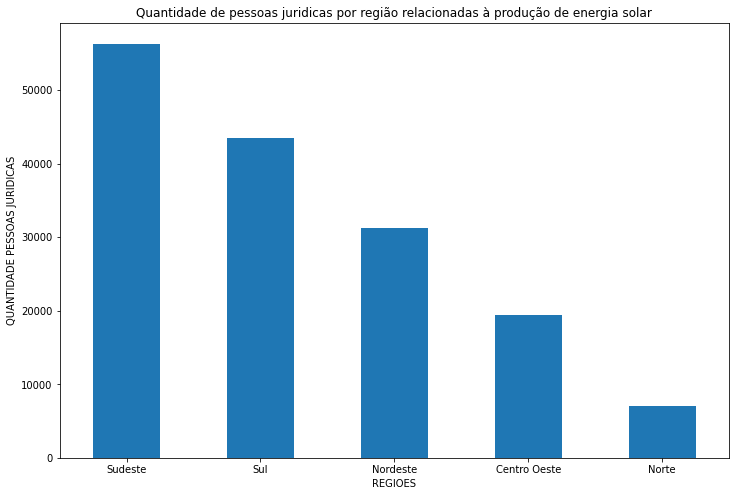

In [ ]:
#PLOTANDO GRÁFICO

grafico.plot.bar(figsize=(12,8),xlabel='REGIÕES',ylabel='QUANTIDADE PESSOAS JURIDICAS',rot=0,title = 'Quantidade de pessoas juridicas por região relacionadas à produção de energia solar')